In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline 

In [2]:
#Load csv into dataframe

data= pd.read_csv('/Users/mehrac/Desktop/DSA-Python/Country-data (1).csv')
df=data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Check for missing values in dataset
missing_values = df.isnull().sum()

# Check for outliers in statistical summary

stat_summary = df.describe()

missing_values, stat_summary

(country       0
 child_mort    0
 exports       0
 health        0
 imports       0
 income        0
 inflation     0
 life_expec    0
 total_fer     0
 gdpp          0
 dtype: int64,
        child_mort     exports      health     imports         income  \
 count  167.000000  167.000000  167.000000  167.000000     167.000000   
 mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
 std     40.328931   27.412010    2.746837   24.209589   19278.067698   
 min      2.600000    0.109000    1.810000    0.065900     609.000000   
 25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
 50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
 75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
 max    208.000000  200.000000   17.900000  174.000000  125000.000000   
 
         inflation  life_expec   total_fer           gdpp  
 count  167.000000  167.000000  167.000000     167.000000  
 mean     7.781832   70.555689    2.

In [6]:
df.set_index('country', inplace=True)

For this project we will keep the outliers due to the following assumptions: 
<br> <br> Real-world relevance. Outliers can describe the real state a country is in right now, requiring aid or being a benchmark for development. 
<br> Data integrity. Since the dataset is not large, removing data can result in lower perfomance. 


Lets Scale the data

In [7]:
from sklearn.preprocessing import StandardScaler #scaling the data
column_names = df.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Lets fit PCA

In [8]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

Variance Explanation

In [9]:
explained_var = pca.explained_variance_ratio_

Decide number of Components

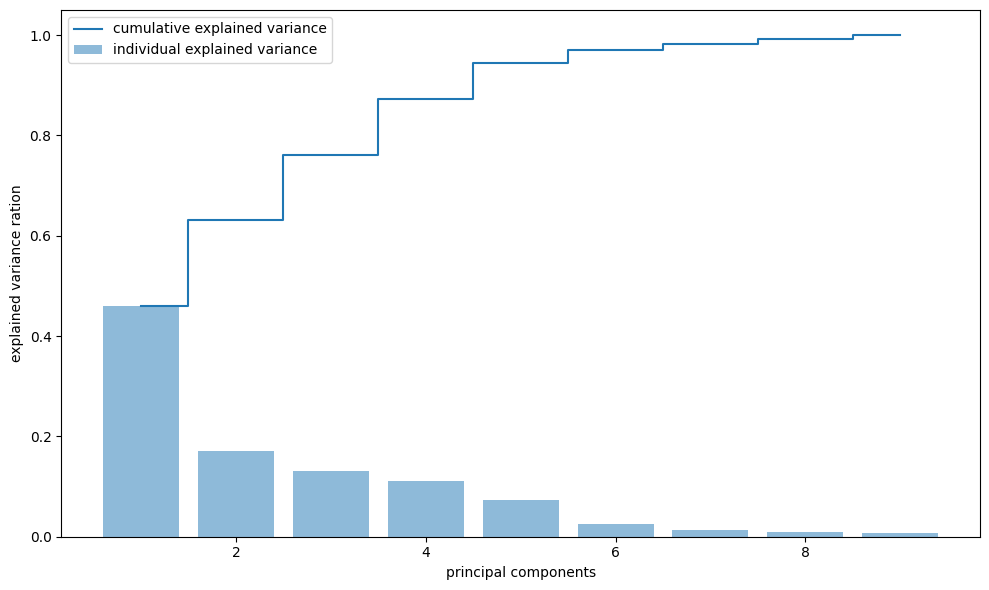

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_var) +1), np.cumsum(explained_var), where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ration')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

First 4 components explain approximately 87% of variance, we will therefore proceed with 4 components.

In [11]:
pca = PCA(n_components=4)
pca_data_transformed = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data= pca_data_transformed, columns=['Principal Comp 1', 'Principal Comp 2', 'Principal Comp 3', 'Principal Comp 4'])
df_pca.head()

,Principal Comp 1,Principal Comp 2,Principal Comp 3,Principal Comp 4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


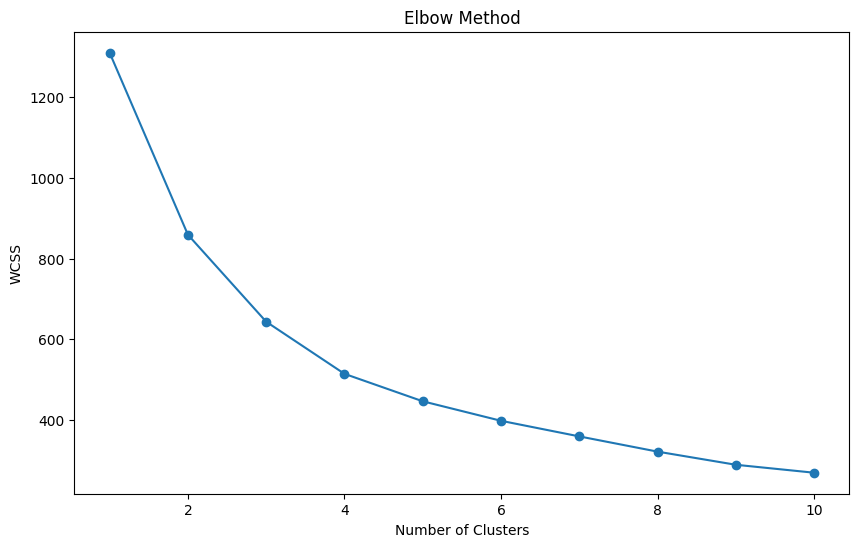

In [12]:
from sklearn.cluster import KMeans

wcss = []

# Elbow method

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state=123, n_init = 10).fit(df_pca)
    wcss.append(kmeans.inertia_)
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, random_state=42, n_init=10).fit(df_pca)
kmeans_clusters = kmeans.fit_predict(df_pca)

df['CLuster_KMeans'] = kmeans_clusters
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,CLuster_KMeans
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


Visual Representations of Clusters

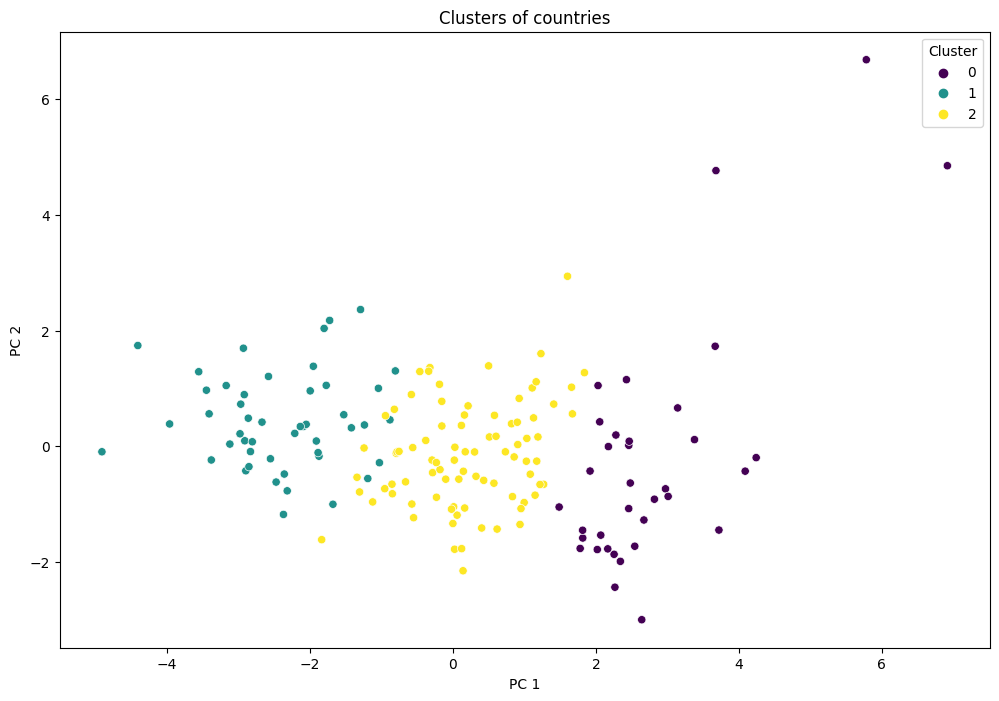

In [14]:
df_pca['Cluster_KMeans'] = kmeans_clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Comp 1', y='Principal Comp 2', hue='Cluster_KMeans', palette='viridis', data=df_pca)
plt.title('Clusters of countries')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title = 'Cluster')
plt.show()

Hierarchical Clustering

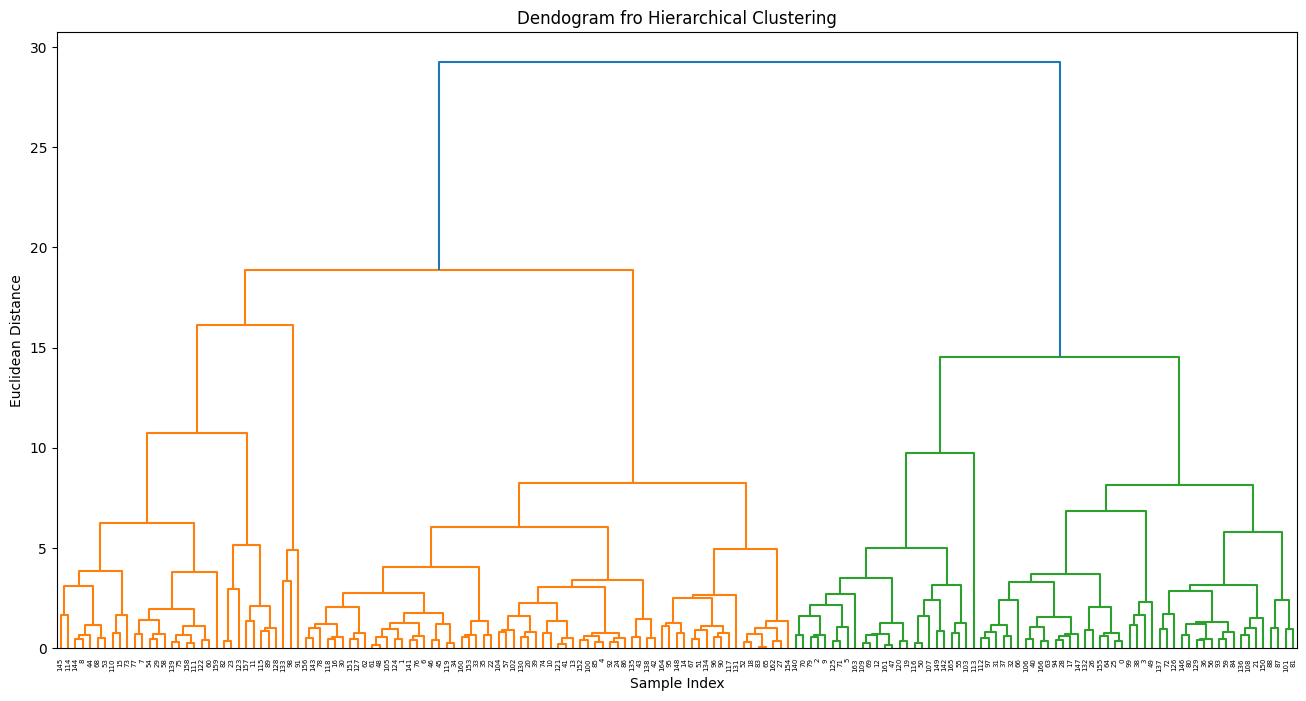

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_pca.drop('Cluster_KMeans', axis = 1), method = 'ward')

plt.figure(figsize=(16, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendogram fro Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg_clusteting = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clusters = agg_clusteting.fit_predict(df_pca.drop('Cluster_KMeans', axis=1))

df['Cluster_Hierarchical'] = agg_clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
cols_needed = df.select_dtypes(exclude='object').columns[:9]
df.groupby('Cluster_Hierarchical')[cols_needed].mean().T

Cluster_Hierarchical,0,1,2
child_mort,6.003030,74.598529,16.974242
exports,59.221212,28.876456,44.656061
health,8.527576,6.054706,6.743788
imports,49.387879,39.461263,53.295455
income,48133.333333,5582.250000,13563.181818
inflation,4.186576,13.080809,4.119909
life_expec,79.939394,62.492647,74.171212
total_fer,1.853939,4.284265,2.118182
gdpp,43551.515152,2588.058824,8361.000000
